In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\users\PC Gaming\desktop\menu.csv')

In [3]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
data = df[["Total Fat (% Daily Value)", "Saturated Fat (% Daily Value)", "Cholesterol (% Daily Value)", 
          "Sodium (% Daily Value)", "Carbohydrates (% Daily Value)", "Dietary Fiber (% Daily Value)",
          "Vitamin A (% Daily Value)", "Vitamin C (% Daily Value)", "Calcium (% Daily Value)", "Iron (% Daily Value)", 
          "Category"]]

In [5]:
data.head()

,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Category
0,20,25,87,31,10,17,10,0,25,15,Breakfast
1,12,15,8,32,10,17,6,0,25,8,Breakfast
2,35,42,15,33,10,17,8,0,25,10,Breakfast
3,43,52,95,36,10,17,15,0,30,15,Breakfast
4,35,42,16,37,10,17,6,0,25,10,Breakfast


In [6]:
data['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

array([[<AxesSubplot:title={'center':'Carbohydrates (% Daily Value)'}>]],
      dtype=object)

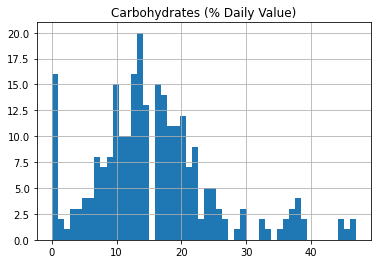

In [7]:
data.hist(column='Carbohydrates (% Daily Value)', bins=50)

In [8]:
data.columns

Index(['Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)',
       'Cholesterol (% Daily Value)', 'Sodium (% Daily Value)',
       'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Category'],
      dtype='object')

In [9]:
X = data[['Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)', 
          'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)',
          'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)',
          'Iron (% Daily Value)']].values  #.astype(float)
X[0:5]

array([[20, 25, 87, 31, 10, 17, 10,  0, 25, 15],
       [12, 15,  8, 32, 10, 17,  6,  0, 25,  8],
       [35, 42, 15, 33, 10, 17,  8,  0, 25, 10],
       [43, 52, 95, 36, 10, 17, 15,  0, 30, 15],
       [35, 42, 16, 37, 10, 17,  6,  0, 25, 10]], dtype=int64)

In [10]:
y = data['Category'].values
y[0:5]

array(['Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast'],
      dtype=object)

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.08311032, -0.18675333,  2.3628775 ,  0.43033103, -0.61488307,
         1.66312459, -0.1409127 , -0.32457391,  0.23705644,  0.83448094],
       [-0.44935918, -0.56286384, -0.35791541,  0.47201735, -0.61488307,
         1.66312459, -0.30538992, -0.32457391,  0.23705644,  0.0304813 ],
       [ 0.6036063 ,  0.45263453, -0.11683249,  0.51370366, -0.61488307,
         1.66312459, -0.22315131, -0.32457391,  0.23705644,  0.26019549],
       [ 0.96985516,  0.82874504,  2.63840083,  0.6387626 , -0.61488307,
         1.66312459,  0.06468383, -0.32457391,  0.53139586,  0.83448094],
       [ 0.6036063 ,  0.45263453, -0.08239207,  0.68044892, -0.61488307,
         1.66312459, -0.30538992, -0.32457391,  0.23705644,  0.26019549]])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (208, 10) (208,)
Test set: (52, 10) (52,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=2)

In [15]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Smoothies & Shakes', 'Breakfast', 'Coffee & Tea', 'Coffee & Tea',
       'Coffee & Tea'], dtype=object)

In [16]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9182692307692307
Test set Accuracy:  0.8461538461538461


In [21]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [22]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Smoothies & Shakes', 'Breakfast', 'Coffee & Tea', 'Coffee & Tea',
       'Coffee & Tea'], dtype=object)

In [23]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8269230769230769
Test set Accuracy:  0.8076923076923077


In [24]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.84615385, 0.84615385, 0.86538462, 0.80769231, 0.80769231,
       0.82692308, 0.80769231, 0.78846154, 0.71153846])

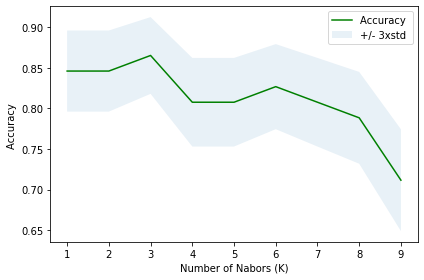

In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [26]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8653846153846154 with k= 3


In [27]:
feature_df = data[['Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)', 
          'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)',
          'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']]
X = np.asarray(feature_df)
X[0:5]

array([[20, 25, 87, 31, 10, 17, 10,  0, 25, 15],
       [12, 15,  8, 32, 10, 17,  6,  0, 25,  8],
       [35, 42, 15, 33, 10, 17,  8,  0, 25, 10],
       [43, 52, 95, 36, 10, 17, 15,  0, 30, 15],
       [35, 42, 16, 37, 10, 17,  6,  0, 25, 10]], dtype=int64)

In [28]:
y = np.asarray(data['Category'])
y [0:5]

array(['Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast'],
      dtype=object)

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (208, 10) (208,)
Test set: (52, 10) (52,)


In [30]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [31]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['Smoothies & Shakes', 'Breakfast', 'Coffee & Tea', 'Coffee & Tea',
       'Coffee & Tea'], dtype=object)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

                    precision    recall  f1-score   support

       Beef & Pork       1.00      0.75      0.86         4
         Beverages       0.43      0.60      0.50         5
         Breakfast       0.55      0.67      0.60         9
    Chicken & Fish       0.50      0.60      0.55         5
      Coffee & Tea       0.83      0.94      0.88        16
            Salads       1.00      1.00      1.00         2
Smoothies & Shakes       1.00      0.50      0.67         8
    Snacks & Sides       0.00      0.00      0.00         3

          accuracy                           0.69        52
         macro avg       0.66      0.63      0.63        52
      weighted avg       0.71      0.69      0.68        52



Confusion matrix, without normalization
[[ 3  0  0  0  0  0  0  1]
 [ 0  3  2  0  0  0  0  0]
 [ 0  0  6  2  1  0  0  0]
 [ 0  0  2  3  0  0  0  0]
 [ 0  1  0  0 15  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  2  0  0  2  0  4  0]
 [ 0  1  1  1  0  0  0  0]]


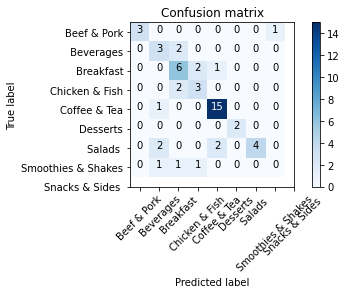

In [68]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Beef & Pork',' Beverages','Breakfast','Chicken & Fish',
                                           'Coffee & Tea','Desserts','Salads ','Smoothies & Shakes',
                                           'Snacks & Sides '],normalize= False,  title='Confusion matrix')

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.6828235490000196

In [36]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (c:\users\pc gaming\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\__init__.py)